# Installs 
Dit betreft eenmalig te gebeuren op een nieuwe machine.

##### pip install vadersentiment
Vadersentiment verbeterde sentiment analyse 

##### pip install textblob
TextBlob, bevat onderandere POS en Tokenizer

##### pip install requests
HTTP library voor python 

##### pip install nltk
NLTK (Natural Language ToolKit)  

##### pip install spacy
Statistiche modellen voor toewijzen en voorsepllen. 

##### pip install unicodedata
Voor lowercase  (unicodedata.normalize)

##### python -m spacy download nl_core_news_sm
Nederlandse model voor spacy
(nl-> Taal - Core-> vocabulary - News-> geschreven tekst uit nieuws en media - sm-> omvang 10mb)

##### pip install wordcloud
Wordcloud visualisatie

##### pip install bokeh
##### pip install altair
Plot visualisatie library

##### pip install qgrid  
Dataframe render

##### pip install ipywidgets
##### jupyter nbextension enable --py widgetsnbextension
Wigdets voor Notebook


# Imports

In [88]:
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import qgrid
import altair as alt
import nltk
import spacy
import nl_core_news_sm
import unicodedata

from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Button, Box, Textarea, Label
from nltk.tokenize.toktok import ToktokTokenizer
from IPython.display import display
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud 
from bokeh.plotting import figure, output_file, show

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Heszar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data laden en omvang bekijken


In [89]:
survey_data = pd.read_csv("Ontvangen bestanden/csvSpeeldata_MalsM.csv", ";")

print("Aantal rijen en kolommen" , survey_data.shape)
survey_data.head()

both_sex = survey_data
male = survey_data[survey_data['Sex'] == 1]
female = survey_data[survey_data['Sex'] == 2]


Aantal rijen en kolommen (766, 7)


### Binair geslacht AANDACHT

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FF20BD4A8>,
      dtype=object)

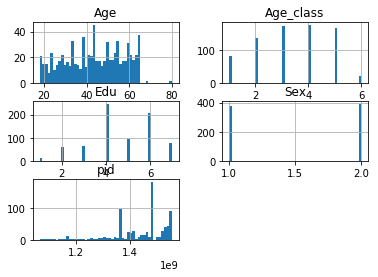

In [90]:
survey_data.hist(bins= 50)

### Aantal geslacht

In [91]:
survey_data.groupby(['Sex']).count()


,pid,Age,Age_class,Edu,Wanneer vind jij een merk menselijk in zijn doen en laten?,Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?
Sex,,,,,,
1,374,374,374,374,374,374
2,392,392,392,392,392,392



### Leeftijd

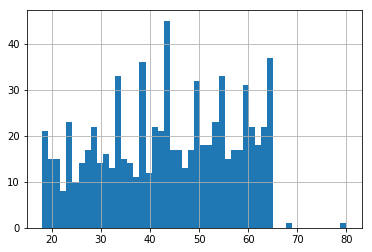

In [92]:
survey_data["Age"].hist(bins= 50)

### Onderwijs niveau

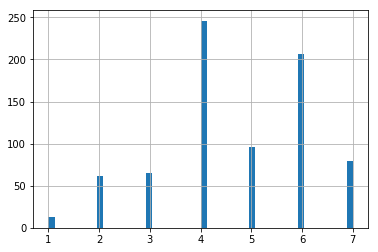

In [93]:
survey_data["Edu"].hist(bins= 50)

Sex
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
2    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

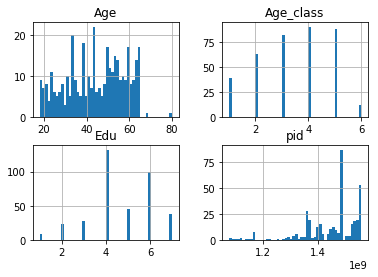

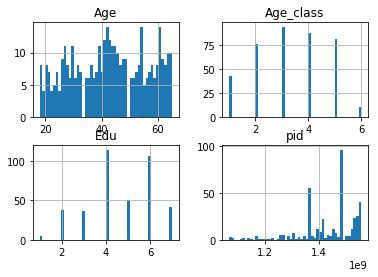

In [94]:
survey_data.groupby('Sex').hist(bins= 50)

### Aantal gesorteerd op leeftijd klasse

In [95]:
survey_data.groupby('Age_class').count()

,pid,Sex,Age,Edu,Wanneer vind jij een merk menselijk in zijn doen en laten?,Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?
Age_class,,,,,,
1,82,82,82,82,82,82
2,139,139,139,139,139,139
3,176,176,176,176,176,176
4,178,178,178,178,178,178
5,169,169,169,169,169,169
6,22,22,22,22,22,22


In [96]:
survey_data.groupby('Edu').count()

,pid,Sex,Age,Age_class,Wanneer vind jij een merk menselijk in zijn doen en laten?,Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?
Edu,,,,,,
1,13,13,13,13,13,13
2,61,61,61,61,61,61
3,65,65,65,65,65,65
4,246,246,246,246,246,246
5,96,96,96,96,96,96
6,206,206,206,206,206,206
7,79,79,79,79,79,79


# Vanaf Hier gaan we schoonmaken en re-orderen
- Sentminet analyse
- Visualisatie voor sentiment analyse

- Visualisatie voor het geheel

In [157]:
def helper(filter_box):
    valueOftest = filter_box
    print(valueOftest)

        
ok_btn = widgets.Button(
    description='Filter',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='woorden filteren',
    icon='check'
)

filter_box = widgets.Text(
    value= '',
    placeholder='Woorden filter',
    description='Woorden:',

)

box_layout = Layout(
    display='flex',
    flex_flow='row',
    align_items='stretch',
    width='70%'
)

x=interactive(helper,filter_box=filter_box)

# display(x)




Box([filter_box, ok_btn])



Box(children=(Text(value='', description='Woorden:', placeholder='Woorden filter'), Button(button_style='succe…

# WordCloud

##### Filter maken voor stopwoorden 

In [100]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('dutch')
test = ['wanneer' , 'emotie' , 'mensen']


widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)


widgets.Text(
    value= 'test',
    placeholder='Type something',
    description='String:',
    disabled=False
)


stopwords_combined = stopword_list + test

for i in test:
    i.join(stopword_list)
    print(i)



# and custom_list = ['emotie']

print(stopwords_combined)

def clean_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_combined]
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

wanneer
emotie
mensen
['de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was', 'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat', 'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij', 'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog', 'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel', 'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja', 'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf', 'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere', 'wanneer', 'emotie', 'mensen']


##### Vrouwen

In [101]:
NLtext = '''
Een emotie wordt vaak omschreven als een innerlijke beleving of gevoel
van bijvoorbeeld vreugde, angst, boosheid, verdriet dat door een 
bepaalde situatie wordt opgeroepen boos of spontaan kan optreden. 
Emoties zijn subjectieve gevoelens, en gaan samen met lichamelijke 
reacties en gezichtsuitdrukkingen en gedrag.
In biologische zin kan men een emotie ook definiëren als een reactie
van onze hersenen op een affectieve prikkel. 
'''

In [102]:
clean_stopwords(NLtext)

'vaak omschreven innerlijke beleving gevoel bijvoorbeeld vreugde , angst , boosheid , verdriet bepaalde situatie opgeroepen boos spontaan optreden. Emoties subjectieve gevoelens , gaan samen lichamelijke reacties gezichtsuitdrukkingen gedrag. biologische zin definiëren reactie onze hersenen affectieve prikkel.'

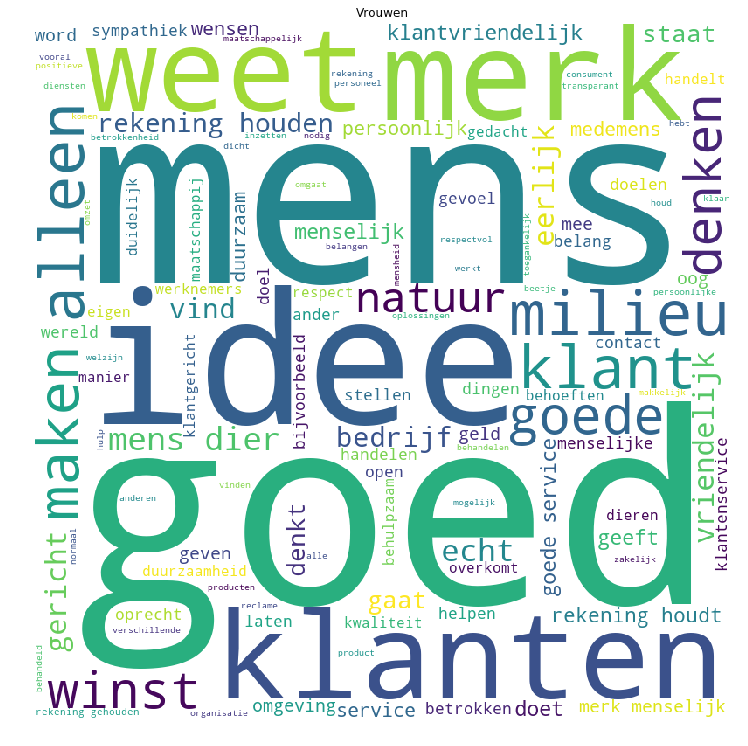

In [103]:
comment_words = ' '
stopwords = stopwords_combined

for val in female['Wanneer vind jij een merk menselijk in zijn doen en laten?']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Vrouwen")
plt.show() 
        

##### Mannen

In [104]:
comment_words = ' '
stopwords = set(['de', 'het', 'ze', 'een', 'en', 'als', 
                 'zijn', 'is', 'voor', 'van', 'of', 'wanneer', 'met'])

for val in man['Wanneer vind jij een merk menselijk in zijn doen en laten?']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Mannen")
plt.show() 
        

NameError: name 'man' is not defined

In [ ]:
comment_words = ' '
stopwords = set(['de', 'het', 'ze', 'een', 'en', 'als', 
                 'zijn', 'is', 'voor', 'van', 'of' ])

for val in speeldata['Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# TextBlob

### Voorbeeld van Texblob samen met Sentiment Intensity Analyzer

In [ ]:
NLtext = '''
Een emotie wordt vaak omschreven als een innerlijke beleving of gevoel
van bijvoorbeeld vreugde, angst, boosheid, verdriet dat door een 
bepaalde situatie wordt opgeroepen boos of spontaan kan optreden. 
Emoties zijn subjectieve gevoelens, en gaan samen met lichamelijke 
reacties en gezichtsuitdrukkingen en gedrag.
In biologische zin kan men een emotie ook definiëren als een reactie
van onze hersenen op een affectieve prikkel. 
'''

In [ ]:
NLblob = TextBlob(NLtext)
ENTranslatedText = NLblob.translate(to="en")

for sentence in ENTranslatedText.sentences:
    print(sentence.sentiment.polarity)

### Tekst met 'Boos' en 'Blij' in verwerkt. 

In [ ]:
NLtext = '''
Een emotie wordt vaak omschreven als een innerlijke beleving of gevoel
van bijvoorbeeld vreugde, angst, boosheid, verdriet dat door een 
bepaalde situatie wordt opgeroepen boos of spontaan kan optreden. 
Emoties zijn subjectieve gevoelens, en gaan samen met lichamelijke 
reacties en gezichtsuitdrukkingen en gedrag.
In biologische zin kan men een emotie ook definiëren als een reactie
van onze hersenen op een affectieve prikkel. 
Toch wel boos en nu heel erg boos.
Blij en heel erg blij, maar dan ook erg blij.
'''

In [ ]:
NLblob = TextBlob(NLtext)
ENTranslatedText = NLblob.translate(to="en")

for sentence in ENTranslatedText.sentences:
    print(sentence.sentiment.polarity)


In [ ]:
analyzer = SentimentIntensityAnalyzer()

NLblob = TextBlob(NLtext)
ENTranslatedText = NLblob.translate(to="en")

vs = analyzer.polarity_scores(ENTranslatedText)

print(vs)



In [ ]:
NLtext = '''
“Je hebt het goed gedaan, maar het kan nog beter”
'''

In [ ]:
NLblob = TextBlob(NLtext)
ENTranslatedText = NLblob.translate(to="en")

for sentence in ENTranslatedText.sentences:
    print(sentence.sentiment.polarity)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

NLblob = TextBlob(NLtext)
ENTranslatedText = NLblob.translate(to="en")

vs = analyzer.polarity_scores(ENTranslatedText)

print(vs)



### Voorbeeld met eigen Surveydata 

In [ ]:
data = both_sex['Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?']

surveyText = " "
for i in data:
    surveyText += i + " "
    
surveyBlobbed = TextBlob(surveyText) 

type(surveyBlobbed)
ENTranslatedText = surveyBlobbed.translate(to="en")

surveyPolarity = analyzer.polarity_scores(ENTranslatedText)

print(surveyPolarity)


# resultaat van vadersentiment over alle data

### Alleen mannen

In [ ]:
data = male['Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?']

surveyText = " "
for i in data:
    surveyText += i + " "
    
surveyBlobbed = TextBlob(surveyText) 

type(surveyBlobbed)
ENTranslatedText = surveyBlobbed.translate(to="en")

surveyPolarity = analyzer.polarity_scores(ENTranslatedText)

print(surveyPolarity)

### Alleen vrouwen

In [ ]:
data = female['Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?']

surveyText = " "
for i in data:
    surveyText += i + " "
    
surveyBlobbed = TextBlob(surveyText) 

type(surveyBlobbed)
ENTranslatedText = surveyBlobbed.translate(to="en")

surveyPolarity = analyzer.polarity_scores(ENTranslatedText)

print(surveyPolarity)

##### Bouw een filter


In [ ]:
btn_male = widgets.Button(description='Mannen', value='male')
btn_female = widgets.Button(description='Vrouwen')
btn_both = widgets.Button(description='Alle')


def btn_eventhandler(obj):
    
    gender = " "
    
    if obj.description == 'Mannen':
        gender = male
    if obj.description == 'Vrouwen':
        gender = female
    if obj.description == 'Alle':
        gender = survey_data
    
    
    print(obj.description)
    column_q1 = gender['Q3. Wanneer vind jij een merk onmenselijk in zijn doen en laten?']
    surveyText = " "

    for woord in column_q1:
        surveyText += woord + " "

    surveyBlobbed = TextBlob(surveyText) 
    type(surveyBlobbed)
    ENTranslatedText = surveyBlobbed.translate(to="en")
    surveyPolarity = analyzer.polarity_scores(ENTranslatedText)
    print(surveyPolarity)


display(btn_male)
btn_male.on_click(btn_eventhandler)
display(btn_female)
btn_female.on_click(btn_eventhandler)
display(btn_both)
btn_both.on_click(btn_eventhandler)